## Modellschätzung

Es gibt mehrere Möglichkeiten, die Koeffizienten mit der KQ-Methode in `Python` zu bestimmen.

In [ ]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(df[['Invoices']], df['Time'])

lm.intercept_, lm.coef_

(0.6417098798216143, array([0.01129164]))

In [ ]:
import statsmodels.formula.api as smf

model = smf.ols(formula='Time ~ Invoices', data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Time   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     190.4
Date:                Wed, 06 Mar 2024   Prob (F-statistic):           5.17e-14
Time:                        17:59:41   Log-Likelihood:                -8.2528
No. Observations:                  30   AIC:                             20.51
Df Residuals:                      28   BIC:                             23.31
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6417      0.122      5.248      0.000       0.391       0.892
Invoices       0.0113      0.001     13.797      0.000       0.010       0.013
==============================================================================
Omnibus:                        2.815   Durbin-Watson:                   1.760
Prob(Omnibus):                  0.245   Jarque-Bera (JB):                1.341
Skew:                          -0.042   Prob(JB):                        0.511
Kurtosis:                       1.968   Cond. No.                         303.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Ein Modell für die Daten

$$
\begin{align}
\text{Time}_i = \beta_0 + \beta_1 \cdot \text{Invoices}_i + e_i \\
e_i \sim N(0, \sigma^2)
\end{align}
$$

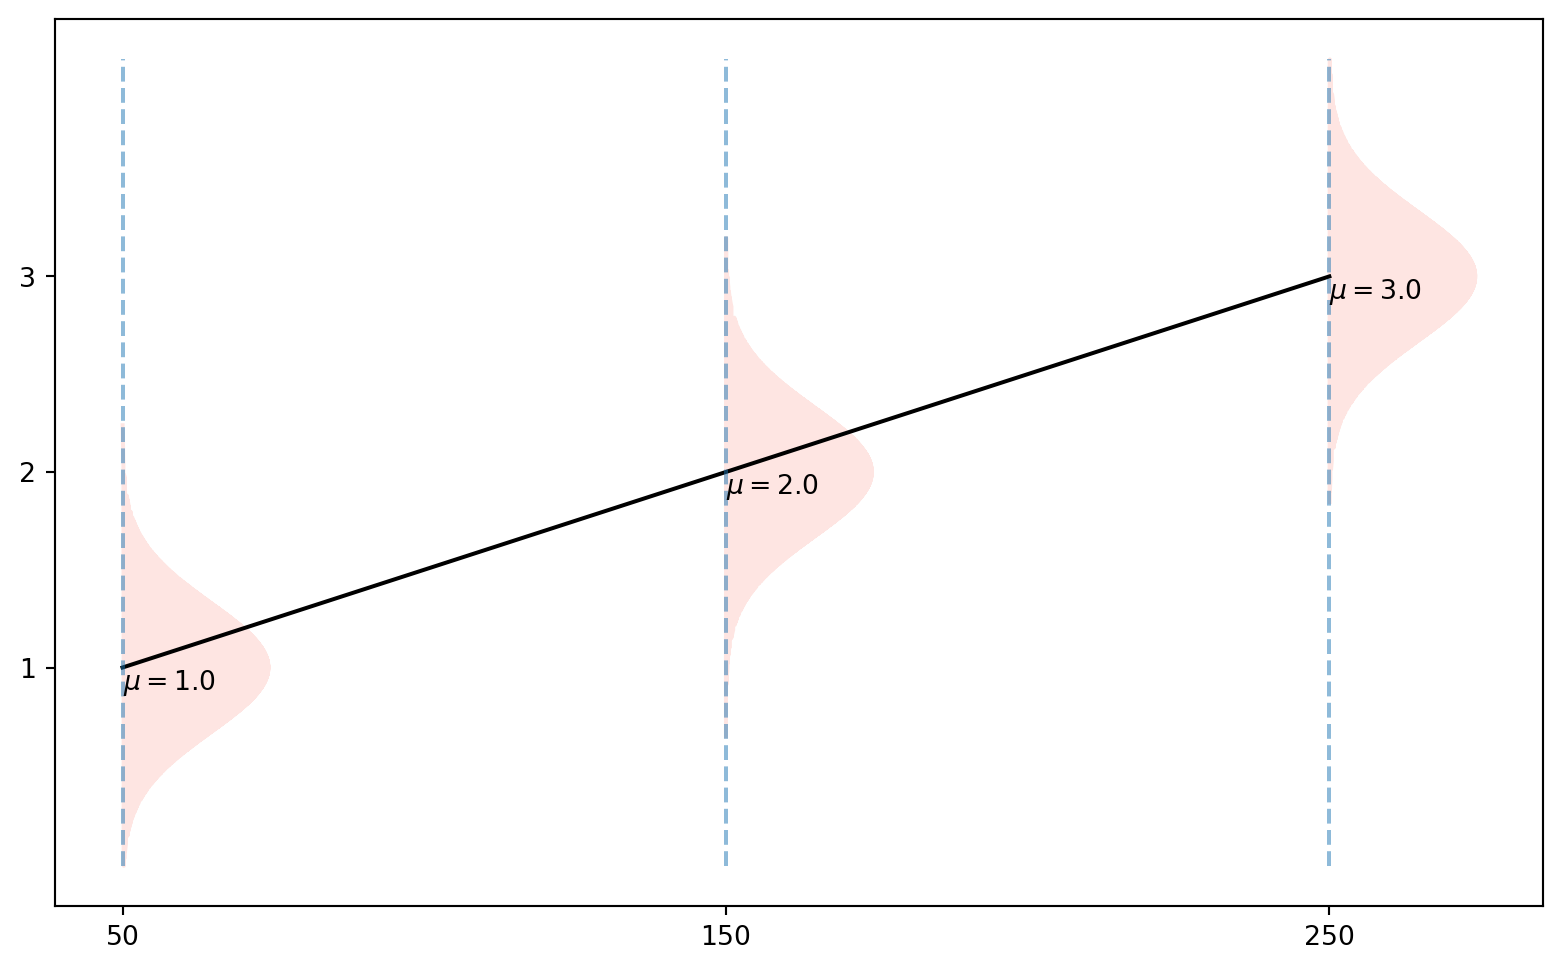

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define variables
x_breaks = np.array([50, 150, 250])
y_hat = 0.5 + 0.01 * x_breaks

# Create a DataFrame similar to expand_grid in R
dt = pd.DataFrame(np.array(np.meshgrid(np.arange(1, 2001), x_breaks)).T.reshape(-1,2), columns=['B', 'x'])

# Add mu, y, and dy columns
dt['mu'] = 0.5 + 0.01 * dt['x']
dt['y'] = np.random.normal(loc=dt['mu'], scale=0.33)
dt['dy'] = dt['x'] + 20 * norm.pdf(dt['y'], loc=dt['mu'], scale=0.33)

# Sort values
dt = dt.sort_values(['x', 'dy'])

# Plotting
plt.figure(figsize=(10, 6))

# Assuming 'invoices' is a DataFrame with 'Invoices' and 'Time' columns
# plt.scatter(invoices['Invoices'], invoices['Time'], alpha=0.5)

for x_val in dt['x'].unique():
    dt_x = dt[dt['x'] == x_val]
    plt.plot(dt_x['dy'], dt_x['y'], alpha=0.2, color='salmon')

plt.plot(dt['x'], dt['mu'], color='black')
plt.vlines(x_breaks, ymin=dt['y'].min(), ymax=dt['y'].max(), linestyles='dashed', alpha=0.5)

for x_val, y_val in zip(x_breaks, y_hat):
    plt.text(x_val, y_val, r'$\mu = {}$'.format(round(y_val, 1)), va='top')

plt.xticks(x_breaks)
plt.yticks(0.5 + 0.01 * x_breaks)
plt.show()